# Exomoon Transit Modeling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gefera as gf

Define the parameters of the transit:

In [2]:
t = np.linspace(-0.6, 0.2, 10000)

# dynamical parameters for the planet
ap = 215                    # semimajor axis in stellar radii
tp = -91.25                 # starting time in days
ep = 0.0                    # eccentricity
pp = 365                    # period in days
wp = 0.1 * np.pi / 180      # longitude of periastron in radians
ip = 89.8 * np.pi / 180     # inclination in radians

# dynamical parameters for the moon
am = 10                     # semimajor axis of moon's orbit around the planet
tm = -4.2                   # starting time in days
em = 0.0                    # eccentricity 
pm = 8                      # period in days
om = 45 * np.pi / 180       # longitude of the ascending node in radians
wm = -90 * np.pi / 180      # longitude of periastron in radians
im = 90.0 * np.pi / 180     # inclination in radians
mm = 0.01                   # moon/planet mass ratio

# other parameters
u1 = 0.5                    # first quadratic limb-darkening parameter
u2 = 0.3                    # second quadratic limb-darkening parameter
rp = 0.1                    # radius of the planet in stellar radii
rm = 0.06                   # radius of the moon in stellar radii

Now we can build the system. We start by defining the primary orbit, or the orbit of the planet, using `gf.orbits.PrimaryOrbit`. We then define the orbit of the moon using `gf.orbits.SatelliteOrbit`. We pass both of these orbits to `gf.systems.HierarchicalSystem` to define the dynamical system.

In [3]:
po = gf.orbits.PrimaryOrbit(ap, tp, ep, pp, wp, ip)
mo = gf.orbits.SatelliteOrbit(am, tm, em, pm, om, wm, im, mm)
sys = gf.systems.HierarchicalSystem(po, mo)

Now let's compute the flux (and its gradients!) and plot it:

CPU times: user 18.1 ms, sys: 9.05 ms, total: 27.2 ms
Wall time: 28.4 ms


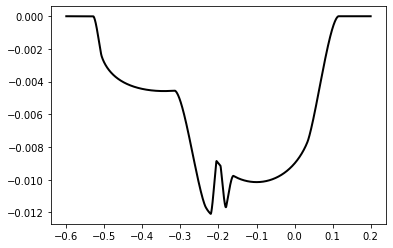

In [4]:
%time flux, grad_flux = sys.lightcurve(t, u1, u2, rp, rm, grad=True)
plt.plot(t, flux, color='k', linewidth=2)

The gradients are stored in a dictionary keyed to the names of the parameters, which are given as `a1, t1, e1... a2, t2, e2` rather than `ap, tp, ep... am, tm, em` to account for the fact that the bodies need not be a planet and moon (they could both be planets, or a star and a planet). Here we access them by repackaging them into a list and looping over them rather than through dictionary keys.

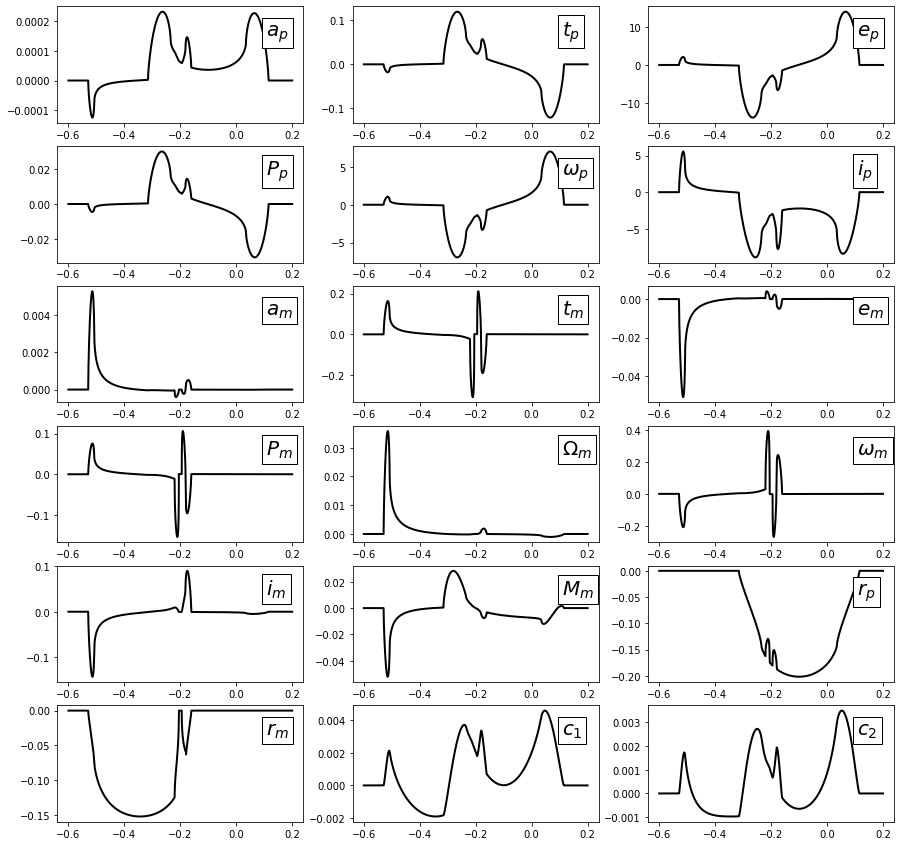

In [5]:
fig, axs = plt.subplots(6, 3, figsize=(15, 15))
axs = axs.flatten()

names = [
    r'$a_p$', r'$t_p$', r'$e_p$', r'$P_p$', r'$\omega_p$', 
    r'$i_p$', r'$a_m$', r'$t_m$', r'$e_m$', r'$P_m$', 
    r'$\Omega_m$', r'$\omega_m$', r'$i_m$', r'$M_m$', 
    r'$r_p$', r'$r_m$', r'$c_1$', r'$c_2$'
]

for i, (name, g) in enumerate(list(grad_flux.items())):
        
    axs[i].plot(t, g, color='k', linewidth=2)
    axs[i].annotate(
        names[i], 
        xy=(0.85, 0.75), 
        xycoords='axes fraction', 
        fontsize=20, bbox={'facecolor': 'w'}
    )

If we want to see what the transit we modeled actually looks like we can use the snapshots function to build a static movie of the transit:

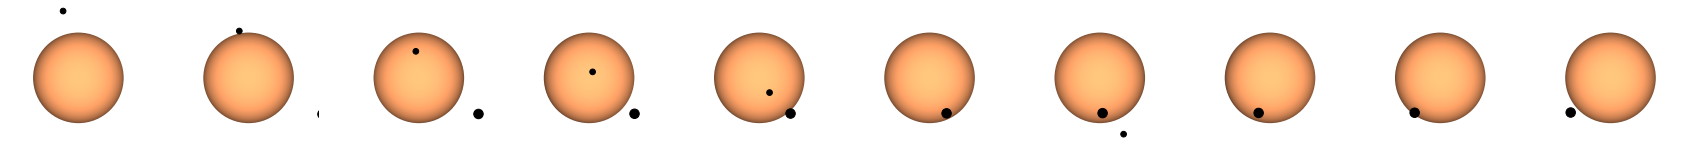

In [6]:
times = t[::1000]
fig, axs = plt.subplots(1, len(times), figsize=(30, 3))
gf.animate.snapshots(sys, axs, times, rp, rm, ld_params=[u1, u2])